In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = 'dogcat/train'
data_test_path = 'dogcat/test1'
data_val_path = 'dogcat/validation'

In [3]:
img_width = 180
img_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 25000 files belonging to 2 classes.


In [5]:
data_cate = data_train.class_names

In [6]:
data_cate

['cats', 'dogs']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       validation_split=False)

Found 8000 files belonging to 2 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 12500 files belonging to 1 classes.


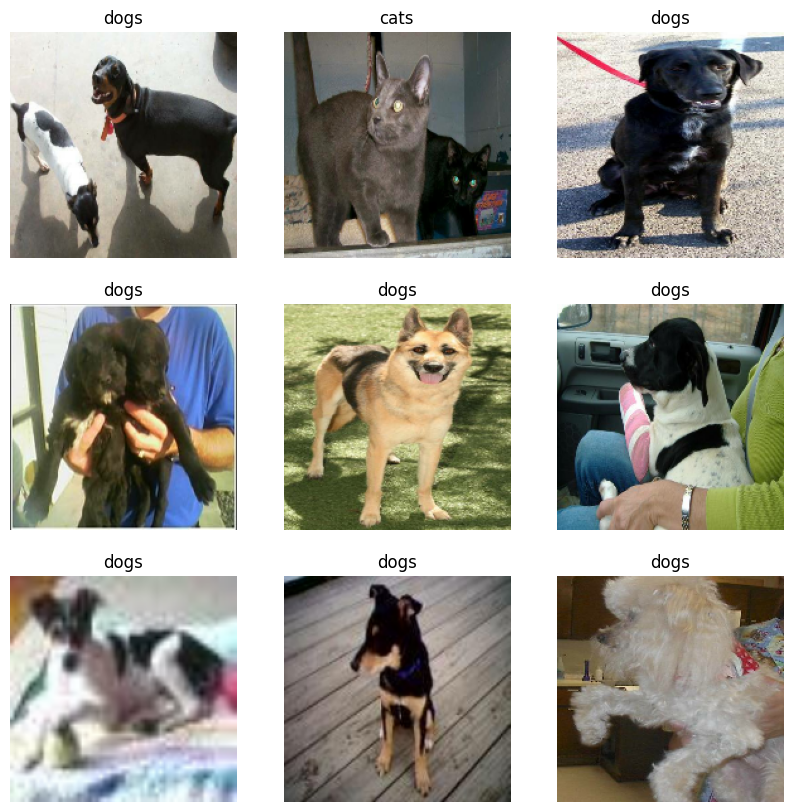

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cate[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cate))

])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 5
histroy = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 150s 188ms/step - accuracy: 0.6175 - loss: 0.8973 - val_accuracy: 0.7577 - val_loss: 0.4953
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 182ms/step - accuracy: 0.7458 - loss: 0.5137 - val_accuracy: 0.7883 - val_loss: 0.4515
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 136s 174ms/step - accuracy: 0.7863 - loss: 0.4627 - val_accuracy: 0.8322 - val_loss: 0.3814
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 181ms/step - accuracy: 0.8162 - loss: 0.4108 - val_accuracy: 0.8259 - val_loss: 0.3776
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 136s 173ms/step - accuracy: 0.8382 - loss: 0.3695 - val_accuracy: 0.8634 - val_loss: 0.3206


Text(0.5, 1.0, 'Loss')

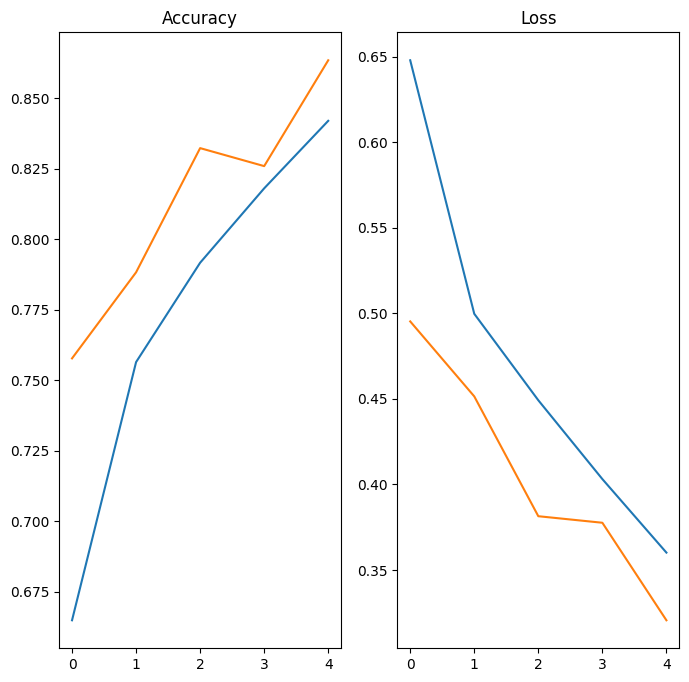

In [21]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,histroy.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,histroy.history['val_accuracy'],label = 'Validaton Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,histroy.history['loss'],label = 'Training loss')
plt.plot(epochs_range,histroy.history['val_loss'],label = 'Validaton Loss')
plt.title('Loss')

In [26]:
image = '9530.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_batch = tf.expand_dims(img_arr,0)


In [27]:
predict = model.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [28]:
score = tf.nn.softmax(predict)

In [29]:
print('Animal in the image is {} with accuracy of {:0.2f}'.format(data_cate[np.argmax(score)],np.max(score)*100))

Animal in the image is dogs with accuracy of 97.64


In [20]:
model.save('Image_classify.keras')